## 前情函数

### tf.keras.preprocessing.sequence.pad_sequences

tf.keras.preprocessing.sequence.pad_sequences(  
&ensp;&ensp;&ensp;&ensp;sequences, maxlen=None, dtype='int32', padding='pre', truncating='pre',  
&ensp;&ensp;&ensp;&ensp;value=0.0  
)  
此函数将一个整数列表转换为维度为 2D 的 Numpy 数组，maxlen 变量值确定列表中最长序列的长度，若序列是短于指定长度将被填充到指定长度，若序列的长度长于指定长度将被截取到指定长度，填充或截断发生的位置分别由参数 padding 和决定 truncating。默认填充是从序列开始处预填充或删除值  
<br>
参数:  
&ensp;&ensp;&ensp;&ensp;sequences：序列列表（每个序列都必须是整数列表）  
&ensp;&ensp;&ensp;&ensp;maxlen：可选Int，所有序列的最大长度。如果未提供，则将序列填充为最长的单个序列的长度  
&ensp;&ensp;&ensp;&ensp;dtype：（可选，默认为int32）。输出序列的类型。要填充长度可变的字符串序列，可以使用object  
&ensp;&ensp;&ensp;&ensp;padding：字符串，pre 或 post（可选，默认为 pre）：在每个序列之前或之后填充  
&ensp;&ensp;&ensp;&ensp;truncating：字符串，pre 或 post（可选，默认为 pre）：从序列中大于 maxlen 或等于的序列的开头或结尾删除值，post 则是从末尾操作  
&ensp;&ensp;&ensp;&ensp;value：浮点型或字符串型，填充值。（可选，默认为0。）  
返回值:  
&ensp;&ensp;&ensp;&ensp;Numpy 数组，shape=(len(sequences), maxlen)

默认选取**最长的列表元素为准**  
默认**填充值为 0**  
默认**填充方式为 pre**（从前填充）

In [1]:
import tensorflow as tf

In [2]:
sequence = [[1], [2, 3], [4, 5, 6]] 
tf.keras.preprocessing.sequence.pad_sequences(sequence)

array([[0, 0, 1],
       [0, 2, 3],
       [4, 5, 6]])

指定填充 -1

In [3]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, value=-1) 

array([[-1, -1,  1],
       [-1,  2,  3],
       [ 4,  5,  6]])

指定填充模式为从后填充

In [4]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post') 

array([[1, 0, 0],
       [2, 3, 0],
       [4, 5, 6]])

指定最大序列长度为 2 且截断方式为 post，截断尾部操作，若为默认的 pre 操作，输出为  
array([[0, 1],  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;[2, 3],  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;[4, 5]])

In [5]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=2, truncating='post') 

array([[0, 1],
       [2, 3],
       [4, 5]])

### tf.keras.datasets.imdb.load_data
tf.keras.datasets.imdb.load_data(  
&ensp;&ensp;&ensp;&ensp;path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113,  
&ensp;&ensp;&ensp;&ensp;start_char=1, oov_char=2, index_from=3, \*\*kwargs  
)  
**这里仅做简单介绍**  
参数:  
&ensp;&ensp;&ensp;&ensp;path：数据的缓存位置（相对于~/.keras/dataset）  
&ensp;&ensp;&ensp;&ensp;num_words：整数或无。根据单词出现的频率（在训练集中）对单词进行排名，并且仅保留 num_words 个最频繁出现的单词。频率较低的单词将在序列数据中显示为 oov_char 值。如果为None，将保留所有单词。(默认为无，因此保留所有单词)  
&ensp;&ensp;&ensp;&ensp;skip_top：跳过前N个最频繁出现的单词（可能没有参考意义）。这些单词将oov_char在数据集中显示为 值。默认值为0，因此不会跳过任何单词  
&ensp;&ensp;&ensp;&ensp;maxlen：int或无。最大序列长度。更长的序列将被截断。默认为无，表示没有截断  
&ensp;&ensp;&ensp;&ensp;seed：int 随机种子，用于随机打乱数据    
&ensp;&ensp;&ensp;&ensp;start_char：int 序列的开始将以该字符标记。默认为1，因为 0 通常是填充字符  
&ensp;&ensp;&ensp;&ensp;oov_char：int 言外之意。由于 num_words 或 skip_top限制而被删掉的单词将被替换为该字符  
&ensp;&ensp;&ensp;&ensp;index_from：int 用此索引和更高的索引索引实际单词  
&ensp;&ensp;&ensp;&ensp;**kwargs：用于向后兼容  

返回值:  
&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;Numpy数组的元组：(x_train, y_train), (x_test, y_test)
<br>
我们只需要**指定 num_words 的值**就行了，英文常用词汇大概在3000~5000，所以我们在读取数据时设定值为 5000，其中截长补短部分也可直接在数据读入时进行，但为了较统计学方式的设定值，我们利用 75% 的值作为 maxlen 的取值

In [6]:
# 统一文本长度，截长补短处代码
# x_train = tf.keras.preprocessing.sequence.pad_sequences(train_data,
#                              padding='post',
#                              truncating='post',
#                              maxlen=length)
# x_test = tf.keras.preprocessing.sequence.pad_sequences(test_data,
#                              padding='post',
#                              truncating='post',
#                              maxlen=length)

### 中文分词词库 jieba 使用初步
jieba 的命名是一个有趣的故事，跟‘结巴’同音，因为结巴说话就是结结巴巴一个词一个词的突出，首次使用时可使用`!pip install jieba`在 jupyter 实现安装  
<br>
**三种分词模式:**  
① 精确模式：试图将句子最精确地切开，适合文本分析  
② 全模式：把句子中所有的可以成词的词语都扫描出来, 速度非常快，但是不能解决歧义  
③ 搜索引擎模式：在精确模式的基础上，对长词再次切分，提高召回率，适合用于搜索引擎分词  
<br>
**特点:**  
• 支持繁体分词  
• 支持自定义词典  
<br>
其中`支持自定义词典`优点尤为突出，在处理一些特定情境会话时可以将专业名词划分出来  
  
**结巴分词使用**  
• jieba.cut 方法接受三个输入参数: 需要分词的字符串；cut_all 参数用来控制是否采用全模式；HMM 参数用来控制是否使用 HMM 模型  
• jieba.cut_for_search 方法接受两个参数：需要分词的字符串；是否使用 HMM 模型。该方法适合用于搜索引擎构建倒排索引的分词  
• jieba.cut 以及 jieba.cut_for_search 返回的结构都是一个可迭代的 generator，可以使用 for 循环来获得分词后得到的每一个词语，或者用jieba.lcut 以及 jieba.lcut_for_search 直接返回 list  

In [7]:
import jieba

In [8]:
text = '我本科毕业于电子科技大学，现在已被保送电子科技大学硕士研究生'
print('文本信息:', text)

文本信息: 我本科毕业于电子科技大学，现在已被保送电子科技大学硕士研究生


**注意:** 直接使用 `jieba.cut` 需要 `list` 操作将 generator 转换为列表形式

In [9]:
word_list = jieba.cut(text)
print(list(word_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.799 seconds.
Prefix dict has been built successfully.


['我', '本科毕业', '于', '电子科技', '大学', '，', '现在', '已', '被', '保送', '电子科技', '大学', '硕士', '研究生']


使用 `join` 可以很好的适配 generator，精准模式直接分割文本信息

In [10]:
word_list = jieba.cut(text, cut_all=False)
print("精准模式分词结果为:" + "/".join(word_list))

精准模式分词结果为:我/本科毕业/于/电子科技/大学/，/现在/已/被/保送/电子科技/大学/硕士/研究生


全模式会把文本信息的每个词的所有可能组合进行输出

In [11]:
word_list = jieba.cut(text, cut_all=True)
print("全模式分词结果为:" + "/".join(word_list))

全模式分词结果为:我/本科/本科毕业/毕业/于/电子/电子科/电子科技/科技/大学/，/现在/已/被/保送/送电/电子/电子科/电子科技/科技/大学/硕士/研究/研究生


`lcut` 操作会把生成的 generator 自动转换为列表

In [12]:
word_list = jieba.lcut(text)
print(word_list)

['我', '本科毕业', '于', '电子科技', '大学', '，', '现在', '已', '被', '保送', '电子科技', '大学', '硕士', '研究生']


搜索引擎模式，类似搜索引擎一样组合并提取关键词

In [13]:
word_list = jieba.lcut_for_search(text)
print(word_list)

['我', '本科', '毕业', '本科毕业', '于', '电子', '科技', '电子科', '电子科技', '大学', '，', '现在', '已', '被', '保送', '电子', '科技', '电子科', '电子科技', '大学', '硕士', '研究', '研究生']


为了将<font face="楷体" color=red size=5>电子科技大学</font>作为一个专业名词采取**自定义字典模式**，其中也包括`本科毕业`词汇

In [14]:
with open('mydict.txt', 'w', encoding='utf-8') as file:
    file.write('电子科技大学\n本科毕业')

In [15]:
jieba.load_userdict('mydict.txt')

word_list = jieba.lcut(text)
print(word_list)

['我', '本科毕业', '于', '电子科技大学', '，', '现在', '已', '被', '保送', '电子科技大学', '硕士', '研究生']


## 全连接网络实现正式开始

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


tf.__version__

'2.0.0'

### 下载并装载数据集
TensorFlow2.x 读取的数据是已经装载并映射好的数据集，有关数据集的格式参见 **RNN(LSTM)实现正式开始** 如何将文字信息与数字信息映射的方法与步骤

In [17]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

In [18]:
print('Training entries:{}, labels:{}'.format(len(train_data), len(train_labels)))

Training entries:25000, labels:25000


可以发现数据集为数字列表，共有 25000 个元素，当然测试数据也是如此

In [19]:
print('train detaset first value:\n', train_data[0],
      '\ntrain detaset first label:', train_labels[0],
      '\ntest detaset first value:\n', test_data[0],
      '\ntest detaset first label:', test_labels[0],)

train detaset first value:
 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32] 
train detaset first label: 1 
test detaset fir

### 数据集预处理
由于网络输入数据必须是同维度，因此需要将得到的数据集或切割或填充的方法统一维度(也就是每一个数据列表的元素个数必须相同)  

获取训练集列表元素排位在 75% 的长度，以此作为输入的维度

In [20]:
total = []
for i in range(len(train_data)):
    total.append(len(train_data[i]))

sorted_total = sorted(total)
length = sorted_total[int(len(sorted_total) * 0.75)]
del total, sorted_total

print('75% length is:', length)

75% length is: 291


统一文本长度，截长补短

In [21]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                             padding='post',
                             truncating='post',
                             maxlen=length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                             padding='post',
                             truncating='post',
                             maxlen=length)

In [22]:
print('x_train.shape:', x_train.shape,
      '\nx_test.shape:', x_test.shape)

x_train.shape: (25000, 291) 
x_test.shape: (25000, 291)


In [23]:
print("After padding and truncating：\n", x_train[0])

After padding and truncating：
 [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    5  144   30    2   18   51   36 

### 全连接模型构建

In [24]:
model = tf.keras.models.Sequential()

In [25]:
model.add(tf.keras.layers.Embedding(output_dim=32,
                  input_dim=5000,
                  input_length=length))

`model.add(tf.keras.layers.Flatten())` 功能与下行一样，属于平坦化操作，在前一篇博客中有`tf.keras.layers.GlobalAveragePooling2D()`代替全连接层，全局池化在神经网络的全连接层具有一定的优越性

In [26]:
model.add(tf.keras.layers.GlobalAveragePooling1D())

In [27]:
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 291, 32)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               8448      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 168,962
Trainable params: 168,962
Non-trainable params: 0
_________________________________________________________________


未启用独热编码，我们使用 `sparse_categorical_crossentropy` 作为损失函数

In [29]:
model.compile(optimizer='adam',
       loss='sparse_categorical_crossentropy',
       metrics=['accuracy'])

In [30]:
history = model.fit(x_train,
            train_labels,
            validation_split=0.2,
            epochs=10,
            batch_size=128,
            verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 174us/sample - loss: 0.6029 - accuracy: 0.6894 - val_loss: 0.3947 - val_accuracy: 0.8488
Epoch 2/10
20000/20000 [==============================] - 2s 111us/sample - loss: 0.3189 - accuracy: 0.8715 - val_loss: 0.3129 - val_accuracy: 0.8756
Epoch 3/10
20000/20000 [==============================] - 2s 112us/sample - loss: 0.2525 - accuracy: 0.9010 - val_loss: 0.3045 - val_accuracy: 0.8828
Epoch 4/10
20000/20000 [==============================] - 2s 113us/sample - loss: 0.2214 - accuracy: 0.9160 - val_loss: 0.3211 - val_accuracy: 0.8714
Epoch 5/10
20000/20000 [==============================] - 2s 111us/sample - loss: 0.2006 - accuracy: 0.9232 - val_loss: 0.3089 - val_accuracy: 0.8806
Epoch 6/10
20000/20000 [==============================] - 2s 111us/sample - loss: 0.1836 - accuracy: 0.9316 - val_loss: 0.3241 - val_accuracy: 0.8760
Epoch 7/10
20000/20000 [===========================

### 训练可视化
可以发现明显过拟合了

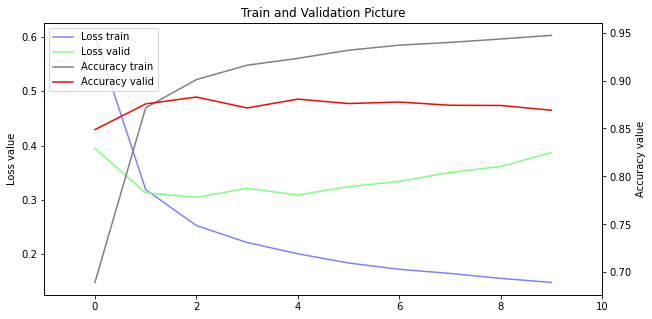

In [31]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(history.history['accuracy'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(history.history['val_accuracy'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.xlim(-1, 10)
plt.show()

### 准确率评估
**我们发现利用已包装好的文件只能预测已包装好的文本，无法对现场摘取的文本进行预测，因为我们不知道其单词与数字的对应关系**，在后面的 RNN(LSTM)我们将使用手动处理数据集方式

In [32]:
test_loss, test_acc = model.evaluate(x_test, test_labels, verbose=2)
print('Test accuracy：', test_acc)

25000/1 - 3s - loss: 0.3215 - accuracy: 0.8564
Test accuracy： 0.85644


### 利用模型预测外部评论

选取[星球大战](https://www.imdb.com/title/tt0080684/reviews)中的一则评论:  
<br>
《星球大战前传V-帝国反击战》于1980年上映，距今取得了巨大成功。要说《帝国反击战》向《新希望》伸张正义，那就是轻描淡写，因为这部电影以各种可能的方式提高了赌注。更长更好的战斗（例如完美无缺的霍斯之战），更黑暗，更成熟的情节，是有史以来**最令人难忘**（且被引用）的曲折之一，AT-AT步行者，Yoda的推出是一些原因为什么《帝国反击战》是完美的续集。与《新希望》不同，这部电影不是乔治·卢卡斯执导的，而是欧文·克什纳执导的，在他应得的荣誉中，他表现出色。克什纳（Kershner）还设法从演员阵容中获得最佳表现，尤其是哈米尔（Hamill），自上一部电影以来，他的性格发生了巨大变化。我们还看到了更多的维达及其疯狂而近乎动物的性格，詹姆斯·厄尔·琼斯的嗓音再次完美地展现了这一点。**《帝国反击战》确实是完美的续集**，因为它充实了乔治·卢卡斯的元素，并且大量继承了自己的作品。**最终成绩-9 + / 10**  
<br>
中文翻译来源 [Google Translate](https://translate.google.com/?um=1&ie=UTF-8&hl=zh-CN&client=tw-ob#en/zh-CN/)  
<br>
可以看出这是一则好评

In [33]:
review_text='''Star Wars Episode V - The Empire Strikes Back was released in 1980, three years after its overwhelmingly successful predecessor.
        To say The Empire Strikes Back does justice to A New Hope is a massive understatement as this film ups the ante in every way possible. Longer and better battles (such as the immaculate Battle of Hoth), a much darker and more mature plot with one of the most memorable (and quoted) twists of all time, AT-AT walkers, the introduction of Yoda are some of the reasons why Empire Strikes Back is the perfect sequel.
        Unlike A New Hope, this film was not directed by George Lucas but Irvin Kershner and to give credit where credit is due he did just as good of a job. Kershner also manages to get the best possible performances out of his cast, especially Hamill whose character changed drastically since the last film. We also see more of Vader and his deranged and almost animalistic character which is again perfectly displayed by James Earl Jones's vocals.
        Empire Strikes Back truly is the perfect sequel as it flourishes on George Lucas's elements as well as bringing in many more of its own in great succession.
        Final Grade - 9+/10
      '''

In [34]:
text_to_list = tf.keras.preprocessing.text.text_to_word_sequence(
    review_text
)

word_index = imdb.get_word_index()
NUM_list = [word_index[key]+3 for key in text_to_list]
num_list = NUM_list.copy()

for i in range(len(num_list)):
    if num_list[i] >= 5000:
        num_list[i] = 2

test_list = tf.keras.preprocessing.sequence.pad_sequences([num_list],
                             padding='post',
                             truncating='post',
                             maxlen=length)

在 TensorFlow2.x 中，Imdb 数据集 1 代表 positive，0 代表 negtive，[说明链接](https://books.google.com/books?id=xR2CDwAAQBAJ&pg=PA181&lpg=PA181&dq=IMDB.npz%EF%BC%8C0+is+positive+or+1+is+positive&source=bl&ots=yVBozSgIXI&sig=ACfU3U2C7eUj7_ouiwvaXXn916GzXtva3g&hl=zh-CN&sa=X&ved=2ahUKEwjI27XGhqHpAhVloXIEHX23DjgQ6AEwAHoECAoQAQ#v=onepage&q&f=false)

In [35]:
sentiment_dict = {1:'pos', 0:'neg'}

pred = model.predict(test_list)
print('predict value:', sentiment_dict[np.argmax(pred)])

predict value: pos


### 文本还原
获取字典，注意需要输入原始数据集，而不是截长补短后的

In [36]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

review = [reverse_word_index.get(i-3, "?") for i in train_data[0]]

print('train_data[0] revert:\n', review)

train_data[0] revert:
 ['?', 'this', 'film', 'was', 'just', 'brilliant', 'casting', 'location', 'scenery', 'story', 'direction', "everyone's", 'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you', 'could', 'just', 'imagine', 'being', 'there', 'robert', '?', 'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same', 'being', 'director', '?', 'father', 'came', 'from', 'the', 'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved', 'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with', 'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the', 'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so', 'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as', 'it', 'was', 'released', 'for', '?', 'and', 'would', 'recommend', 'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly', '?', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end', 'it', 'was', 'so', 'sad', 'and', 'you', 'know', 'what', 'they', 'say', 'if', 'you', 'cry', 'at

train_data[0] 在 Imdb 数据集对应着 `aclImdb/train/pos/576_10.txt` 这个文件，读取这个文件并做对比

In [37]:
with open('./data/aclImdb/train/pos/576_10.txt', 'r') as file:
    message = file.readline()
    print(message)

this film was just brilliant,casting,location scenery,story,direction,everyone's really suited the part they played,and you could just imagine being there,Robert Redford's is an amazing actor and now the same being director,Norman's father came from the same Scottish island as myself,so i loved the fact there was a real connection with this film,the witty remarks throughout the film were great,it was just brilliant,so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch,and the fly-fishing was amazing,really cried at the end it was so sad,and you know what they say if you cry at a film it must have been good,and this definitely was, also congratulations to the two little boy's that played the part's of Norman and Paul they were just brilliant,children are often left out of the praising list i think, because the stars that play them all grown up are such a big profile for the whole film,but these children are amazing and should be

星球大战评论还原，使用未处理的 NUM_list

In [38]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

review = [reverse_word_index.get(i-3, "?") for i in NUM_list]

print('NUM_list revert:\n', review)

NUM_list revert:
 ['star', 'wars', 'episode', 'v', 'the', 'empire', 'strikes', 'back', 'was', 'released', 'in', '1980', 'three', 'years', 'after', 'its', 'overwhelmingly', 'successful', 'predecessor', 'to', 'say', 'the', 'empire', 'strikes', 'back', 'does', 'justice', 'to', 'a', 'new', 'hope', 'is', 'a', 'massive', 'understatement', 'as', 'this', 'film', 'ups', 'the', 'ante', 'in', 'every', 'way', 'possible', 'longer', 'and', 'better', 'battles', 'such', 'as', 'the', 'immaculate', 'battle', 'of', 'hoth', 'a', 'much', 'darker', 'and', 'more', 'mature', 'plot', 'with', 'one', 'of', 'the', 'most', 'memorable', 'and', 'quoted', 'twists', 'of', 'all', 'time', 'at', 'at', 'walkers', 'the', 'introduction', 'of', 'yoda', 'are', 'some', 'of', 'the', 'reasons', 'why', 'empire', 'strikes', 'back', 'is', 'the', 'perfect', 'sequel', 'unlike', 'a', 'new', 'hope', 'this', 'film', 'was', 'not', 'directed', 'by', 'george', 'lucas', 'but', 'irvin', 'kershner', 'and', 'to', 'give', 'credit', 'where', 'cr

### 思考
先看这几个参数(前面已有中文释义)  
•skip_top: skip the top N most frequently occurring words (which may not be informative).  
•start_char: The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.  
•oov_char: words that were cut out because of the num_words or skip_top limit will be replaced with this character.  

那么**对星球大战评论预处理方式正确吗**？其实是**不正确的**，虽然能够还原，但在处理时忽略了一些参数的设置，从  
tf.keras.datasets.imdb.load_data(path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113,  
&ensp;&ensp;&ensp;&ensp;start_char=1, oov_char=2, index_from=3, \*\*kwargs)参数设置  
    与实际打印出的训练数据的值，可以发现，训练数据第一个数值都是 1，这是根据 start_char 参数设定的，在数字列表超过阈值（这里读取设定为 5000），将超过的值用 skip_top 与 oov_char 替换，甚至还有 index_from 参数，而我们仅仅将超过 5000 的阈值用 skip_top=0 代替，这不免与原始数据集有一些误差，但是 TensorFlow2.x 也未提供如何将新的文本转换为数字列表，所以也就只有将就了

## RNN(LSTM)实现正式开始

### 导入必要包

In [58]:
import numpy as np
import datetime
import os
import re

### 必要函数定义
文件获取函数

In [40]:
def read_files(filetype):
    path = './data/aclImdb/'
    file_list = []

    positive_path = path + filetype + "/pos/"
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
    pos_files_num = len(file_list)

    negative_path = path + filetype + '/neg/'
    for f in os.listdir(negative_path):
        file_list += [negative_path + f]
    neg_files_num = len(file_list) - pos_files_num

    print('read', filetype, 'files:', len(file_list))
    print(pos_files_num, 'pos files in', filetype, 'files')
    print(neg_files_num, 'neg files in', filetype, 'files')

    all_labels = ([[1, 0]] * pos_files_num + [[0, 1]] * neg_files_num)
    all_texts = []
    for fi in file_list:
        with open(fi, encoding='utf8') as file_input:
            all_texts += [remove_tags(" ".join(file_input.readlines()))]

    return all_labels, all_texts

数据特殊字符处理(主要针对 html 残留格式)

In [41]:
def remove_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)

In [42]:
train_labels, train_texts = read_files("train")
test_labels, test_texts = read_files("test")

read train files: 25000
12500 pos files in train files
12500 neg files in train files
read test files: 25000
12500 pos files in test files
12500 neg files in test files


In [43]:
print("训练数据，正面评价例子 文本：", train_texts[0])
print("训练数据，正面评价例子 标签：", train_labels[0])
print("训练数据，负面评价例子 文本：", train_texts[12500])
print("训练数据，负面评价例子 标签：", train_labels[12500])

print("测试数据，正面评价例子 文本：", test_texts[0])
print("测试数据，正面评价例子 标签：", test_labels[0])
print("测试数据，负面评价例子 文本：", test_texts[12500])
print("测试数据，负面评价例子 标签：", test_labels[12500])

训练数据，正面评价例子 文本： Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
训练数据，正面评价例子 标签： [1, 0]
训练数据，负面评价例子 文本： Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal

### 建立词汇词典

In [44]:
token = tf.keras.preprocessing.text.Tokenizer(num_words=5000)

token.fit_on_texts(train_texts)

查看读取文档数

In [45]:
print('Files read', token.document_count)

Files read 25000


单词映射排名或索引

In [ ]:
print('Word index', token.word_index)

单词映射为训练期间所出现文档或文本数量

In [47]:
print(token.word_docs)

获取各词出现频率

In [ ]:
print(token.word_counts)

### 文字转数字列表

In [49]:
train_sequences = token.texts_to_sequences(train_texts)
test_sequences = token.texts_to_sequences(test_texts)

print("文本信息：\n", train_texts[0])
print("对应数字信息：\n", train_sequences[0])

文本信息：
 Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
对应数字信息：
 [308, 6, 3, 1068, 208, 8, 2160, 29, 1, 168, 54, 13, 45, 81, 40, 391, 109, 137, 13, 57, 4445, 149, 7, 1, 4986, 481, 68, 5, 260, 11, 2000, 6, 72, 2422, 5, 631, 70, 6, 1, 5, 2001, 

### 文本截长补短
以 300 为例

In [50]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences,
                             padding='post',
                             truncating='post',
                             maxlen=300)
x_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,
                             padding='post',
                             truncating='post',
                             maxlen=300)

In [51]:
x_train.shape

(25000, 300)

In [52]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [53]:
print("填充后数字列表：\n", x_train[0])

填充后数字列表：
 [ 308    6    3 1068  208    8 2160   29    1  168   54   13   45   81
   40  391  109  137   13   57 4445  149    7    1 4986  481   68    5
  260   11 2000    6   72 2422    5  631   70    6    1    5 2001    1
 1530   33   66   63  204  139   64 1229    1    4    1  222  899   28
 3021   68    4    1    9  693    2   64 1530   50    9  215    1  386
    7   59    3 1470 3710  798    5 3509  176    1  391    9 1235   29
  308    3  352  343 2970  142  129    5   27    4  125 1470 2372    5
  308    9  532   11  107 1466    4   57  554  100   11  308    6  226
 4173   47    3 2231   11    8  214    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

### 模型构建

In [54]:
model = tf.keras.models.Sequential()

在前一篇博客中有`tf.keras.layers.GlobalAveragePooling2D()`代替全连接层，全局池化在神经网络的全连接层具有一定的优越性，上面已使用一次，这里使用`tf.keras.layers.Flatten()`

In [55]:
model.add(tf.keras.layers.Embedding(output_dim=32,
                  input_dim=5000,
                  input_length=300))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 32)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 9600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2457856   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 2,618,370
Trainable params: 2,618,370
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

In [62]:
log_dir = os.path.join(
    'logs2.x',
    'train',
    'plugins',
    'profile',
    datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S'))

checkpoint_path = './checkpoint2.x/nlp.{epoch:02d}.h5'

if not os.path.exists('./checkpoint2.x'):
    os.mkdir('./checkpoint2.x')


callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir=log_dir,
                         histogram_freq=2),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                       save_weights_only=True,
                                       verbose=0,
                                       save_freq='epoch'),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
]

In [63]:
history = model.fit(x_train,
            y_train,
            validation_split=0.2,
            epochs=20,
            batch_size=128,
            callbacks=callbacks,
            verbose=1)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 147us/sample - loss: 5.4748e-04 - accuracy: 1.0000 - val_loss: 1.2081 - val_accuracy: 0.7682
Epoch 2/20
20000/20000 [==============================] - 3s 130us/sample - loss: 3.3104e-04 - accuracy: 1.0000 - val_loss: 1.1862 - val_accuracy: 0.7804
Epoch 3/20
20000/20000 [==============================] - 3s 142us/sample - loss: 2.4753e-04 - accuracy: 1.0000 - val_loss: 1.2905 - val_accuracy: 0.7690
Epoch 4/20
20000/20000 [==============================] - 3s 138us/sample - loss: 1.7880e-04 - accuracy: 1.0000 - val_loss: 1.2901 - val_accuracy: 0.7726
Epoch 5/20
20000/20000 [==============================] - 3s 151us/sample - loss: 1.3524e-04 - accuracy: 1.0000 - val_loss: 1.3295 - val_accuracy: 0.7720
Epoch 6/20
20000/20000 [==============================] - 3s 130us/sample - loss: 1.0861e-04 - accuracy: 1.0000 - val_loss: 1.3143 - val_accuracy: 0.7790
Epoch 7/20
20000/20000 [===

### 训练可视乎
由于加入了监控 val_accuracy 的早停参数，训练 7 轮截至

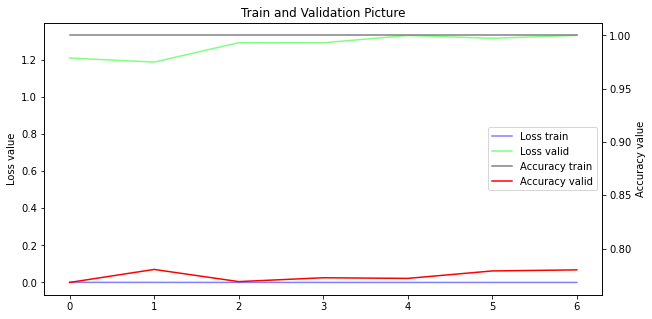

In [64]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
ax1 = fig.add_subplot(111)
ax1.set_title('Train and Validation Picture')
ax1.set_ylabel('Loss value')
line1, = ax1.plot(history.history['loss'], color=(0.5, 0.5, 1.0), label='Loss train')
line2, = ax1.plot(history.history['val_loss'], color=(0.5, 1.0, 0.5), label='Loss valid')
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy value')
line3, = ax2.plot(history.history['accuracy'], color=(0.5, 0.5, 0.5), label='Accuracy train')
line4, = ax2.plot(history.history['val_accuracy'], color=(1, 0, 0), label='Accuracy valid')
plt.legend(handles=(line1, line2, line3, line4), loc='best')
plt.show()

### 模型评估

In [65]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy：', test_acc)

25000/1 - 8s - loss: 2.1999 - accuracy: 0.8380
Test accuracy： 0.83804


### 利用模型预测外部评论

In [66]:
review_text='''Star Wars Episode V - The Empire Strikes Back was released in 1980, three years after its overwhelmingly successful predecessor.
        To say The Empire Strikes Back does justice to A New Hope is a massive understatement as this film ups the ante in every way possible. Longer and better battles (such as the immaculate Battle of Hoth), a much darker and more mature plot with one of the most memorable (and quoted) twists of all time, AT-AT walkers, the introduction of Yoda are some of the reasons why Empire Strikes Back is the perfect sequel.
        Unlike A New Hope, this film was not directed by George Lucas but Irvin Kershner and to give credit where credit is due he did just as good of a job. Kershner also manages to get the best possible performances out of his cast, especially Hamill whose character changed drastically since the last film. We also see more of Vader and his deranged and almost animalistic character which is again perfectly displayed by James Earl Jones's vocals.
        Empire Strikes Back truly is the perfect sequel as it flourishes on George Lucas's elements as well as bringing in many more of its own in great succession.
        Final Grade - 9+/10
      '''

In [67]:
sentiment_dict = {0:'pos', 1:'neg'}

def display_text_sentiment(text):
    print(text)
    input_seq = token.texts_to_sequences([text])
    pad_input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq,
                                  padding='post',
                                  truncating='post',
                                  maxlen=300)
    pred = model.predict(pad_input_seq)
    print('predict value:', sentiment_dict[np.argmax(pred)])

In [68]:
display_text_sentiment(review_text)

Star Wars Episode V - The Empire Strikes Back was released in 1980, three years after its overwhelmingly successful predecessor.
        To say The Empire Strikes Back does justice to A New Hope is a massive understatement as this film ups the ante in every way possible. Longer and better battles (such as the immaculate Battle of Hoth), a much darker and more mature plot with one of the most memorable (and quoted) twists of all time, AT-AT walkers, the introduction of Yoda are some of the reasons why Empire Strikes Back is the perfect sequel.
        Unlike A New Hope, this film was not directed by George Lucas but Irvin Kershner and to give credit where credit is due he did just as good of a job. Kershner also manages to get the best possible performances out of his cast, especially Hamill whose character changed drastically since the last film. We also see more of Vader and his deranged and almost animalistic character which is again perfectly displayed by James Earl Jones's vocals.


### 导入已存储模型进行识别
注意`tf.train.latest_checkpoint`只适用于`ckpt`形式

In [74]:
model.load_weights('./checkpoint2.x/nlp.07.h5')

display_text_sentiment(review_text)

Star Wars Episode V - The Empire Strikes Back was released in 1980, three years after its overwhelmingly successful predecessor.
        To say The Empire Strikes Back does justice to A New Hope is a massive understatement as this film ups the ante in every way possible. Longer and better battles (such as the immaculate Battle of Hoth), a much darker and more mature plot with one of the most memorable (and quoted) twists of all time, AT-AT walkers, the introduction of Yoda are some of the reasons why Empire Strikes Back is the perfect sequel.
        Unlike A New Hope, this film was not directed by George Lucas but Irvin Kershner and to give credit where credit is due he did just as good of a job. Kershner also manages to get the best possible performances out of his cast, especially Hamill whose character changed drastically since the last film. We also see more of Vader and his deranged and almost animalistic character which is again perfectly displayed by James Earl Jones's vocals.
